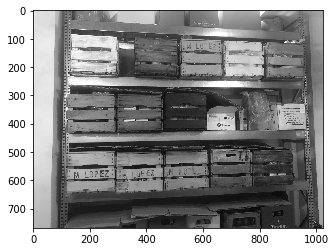

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

bgr_img = cv2.imread('imgs/shelf.JPG')
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY).astype("float32")/255

plt.imshow(gray_img, cmap='gray')
plt.show()

In [2]:
import numpy as np

filter_1 = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
filter_2 = np.array([[-1, -1, -1, -1], [-1, -1, -1, -1], [1, 1, 1, 1], [1, 1, 1, 1]])
filters = np.array([filter_1, filter_2])

filters

array([[[-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1]],

       [[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [ 1,  1,  1,  1],
        [ 1,  1,  1,  1]]])

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

filters_torch = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

In [4]:
filters_params = torch.nn.Parameter(filters_torch)
filters_params.shape

torch.Size([2, 1, 4, 4])

`[ number of output chanels, number of input chanels, hight, width]` 

In [5]:
class Net(nn.Module):
    
    def __init__(self, in_channels, out_channels, kernel_size):
        super(Net, self).__init__()        
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, bias=False)
        self.pool = nn.MaxPool2d(8, 8)

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pool_x = self.pool(activated_x)
        
        return conv_x, activated_x, pool_x

## Initialize model
model = Net(1, 2, (4, 4))
## Initialize weights
model.conv.weight = filters_params

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 2, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
)


In [6]:
gray_img_torch = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
gray_img.shape, gray_img_torch.shape

((768, 1024), torch.Size([1, 1, 768, 1024]))

In [7]:
conv_layer, activated_layer, pooled_layer = model(gray_img_torch)
conv_layer.shape, activated_layer.shape, pooled_layer.shape

(torch.Size([1, 2, 765, 1021]),
 torch.Size([1, 2, 765, 1021]),
 torch.Size([1, 2, 95, 127]))

In [8]:
def viz_layer(layer):
    n_filters = layer.shape[1]
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

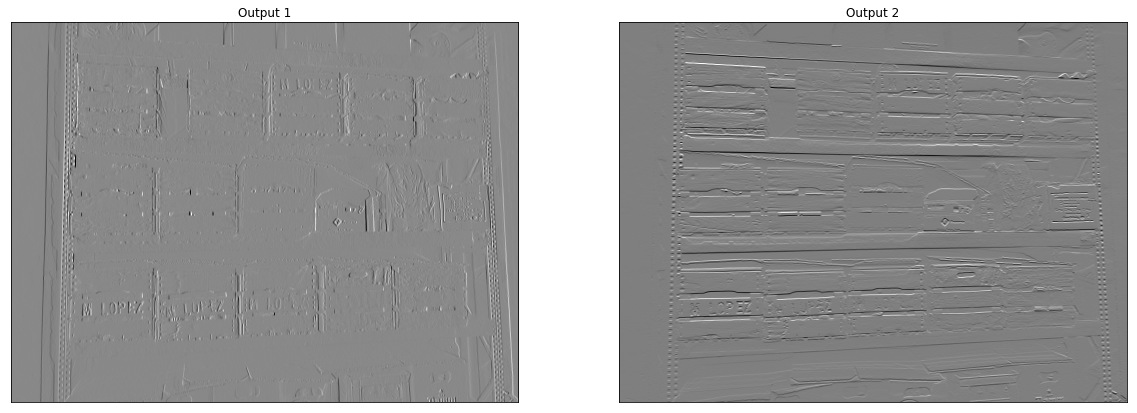

In [9]:
viz_layer(conv_layer)

In [10]:
conv_layer.shape

torch.Size([1, 2, 765, 1021])

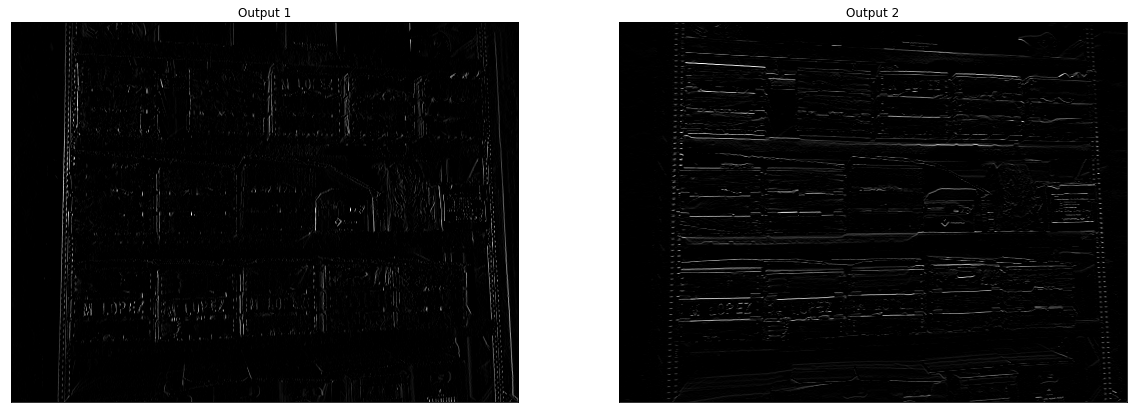

In [11]:
viz_layer(activated_layer)

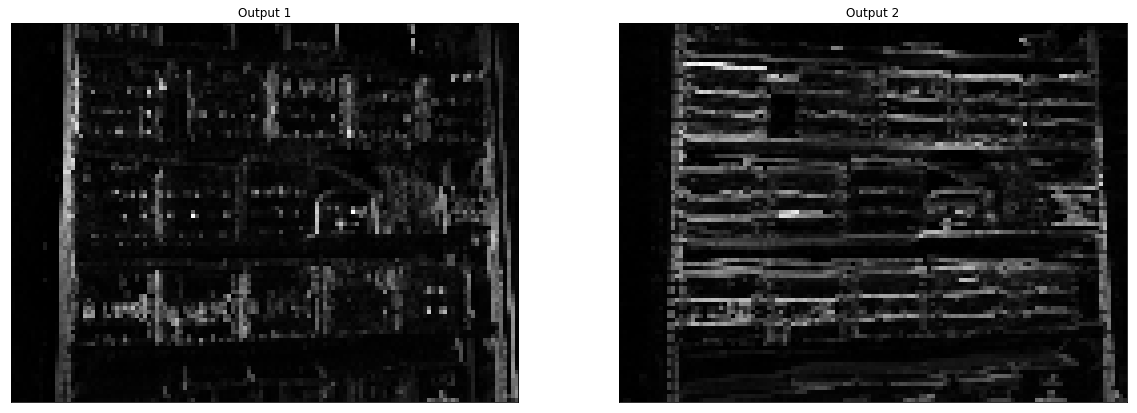

In [12]:
viz_layer(pooled_layer)

In [13]:
pooled_layer.shape

torch.Size([1, 2, 95, 127])